## VISTA: Vehicle Image Sensing for Traffic Automation

### Zero-shot object detectors
- Grounding Dino
- Yolo-World
- With Yolo-World, you get 50 FPS on a NVIDIA v100 and 15 FPS on chapear NVIDIA T4

In [1]:
!nvidia-smi

Thu Mar 28 11:23:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.25                 Driver Version: 536.25       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A2000 8GB Lap...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8               3W /  40W |      0MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\bornaa\Desktop\VISTA


In [29]:
# mac
# SOURCE_VIDEO_PATH = f"{HOME}/data/Fed Way Cameras/FedWay 08 Cam 1 Facing West/TLC00009.AVI"
FOLDER = "\FedWay 08 Cam 1 Facing West"
# Windows
SOURCE_VIDEO_PATH = f"{HOME}\data\Fed Way Cameras{FOLDER}\TLC00009.AVI"
TARGET_VIDEO_PATH = f"{HOME}\data\Fed Way Cameras{FOLDER}\TLC00009_Labeled.AVI"

In [5]:
print(SOURCE_VIDEO_PATH)

C:\Users\bornaa\Desktop\VISTA\data\Fed Way Cameras\FedWay 08 Cam 1 Facing West\TLC00009.AVI


In [8]:
# %cd {HOME}
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt 

C:\Users\bornaa\Desktop\VISTA


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
# !pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/ab/3b/4b9b3d590128bc76b056dee2a4bd932046f965164717217ce773bba50070/ultralytics-8.1.30-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for torch>=1.8.0 from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision>=0.9.0 from https://files.pythonhosted.org/packages/e7/45/419aa0b37254f1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [60]:
# %cd {HOME}
# !git clone https://github.com/ifzhang/ByteTrack.git
# %cd {HOME}/ByteTrack

# # # workaround related to https://github.com/roboflow/notebooks/issues/80
# # !sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

# # for windows, sed (stream editor) doesn't work. There is a one-liner for it inside powershell. 
# # !powershell -command "...." writes the comment
# !powershell -command "pwd"
# !powershell -command "(Get-Content requirements.txt) -replace 'onnx==1.8.1', 'onnx==1.9.0' | Set-Content requirements.txt"


# !pip3 install -q -r requirements.txt
# !python3 setup.py -q develop
# !pip install -q cython_bbox
# !pip install -q onemetric
# # workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
# !pip install -q loguru lap thop

# # the onnx libraries ins requirements don't get install with the specific version.
# # you just have to manually do:
# # !pip install onnx
# # !pip install onnxruntime
# # !pip install onnx-simplifier

# !pip3 install -r requirements.txt

# # # While python3 setup.py develop is still used, the Python Packaging Authority (PyPA) 
# # # now recommends using pip install -e . for installing packages in editable/development 
# # # mode. This newer approach offers better integration with the broader Python 
# # # packaging ecosystem, including dependency resolution.
# # !python3 setup.py develop
# # !pip install -e 
# !pip install cython_bbox
# !pip install onemetric

# # workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
# !pip install loguru lap thop

# from IPython import display
# display.clear_output()


# import sys
# sys.path.append(f"{HOME}/ByteTrack")


# import yolox
# print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [61]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

ModuleNotFoundError: No module named 'lap'

In [14]:
# !pip install supervision==0.1.0


# # from IPython import display
# # display.clear_output()


# # import supervision
# # print("supervision.__version__:", supervision.__version__)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [6]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [8]:
!where python

C:\ProgramData\anaconda3\python.exe
C:\Users\bornaa\AppData\Local\Microsoft\WindowsApps\python.exe


In [7]:
!where python

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe
C:\Users\bornaa\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
!where python

C:\ProgramData\anaconda3\python.exe
C:\Users\bornaa\AppData\Local\Microsoft\WindowsApps\python.exe


In [12]:
from ultralytics import YOLO

# settings
MODEL = "yolov8x.pt"

model = YOLO(MODEL)
model.fuse()


YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [32]:
from supervision.draw.color import ColorPalette
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.video.sink import VideoSink
from supervision.video.dataclasses import VideoInfo
from tqdm.notebook import tqdm

In [31]:
from supervision.video.dataclasses import VideoInfo

VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=1, total_frames=20480)

## Single frame


0: 384x640 6 cars, 2 trucks, 1139.6ms
Speed: 4.0ms preprocess, 1139.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


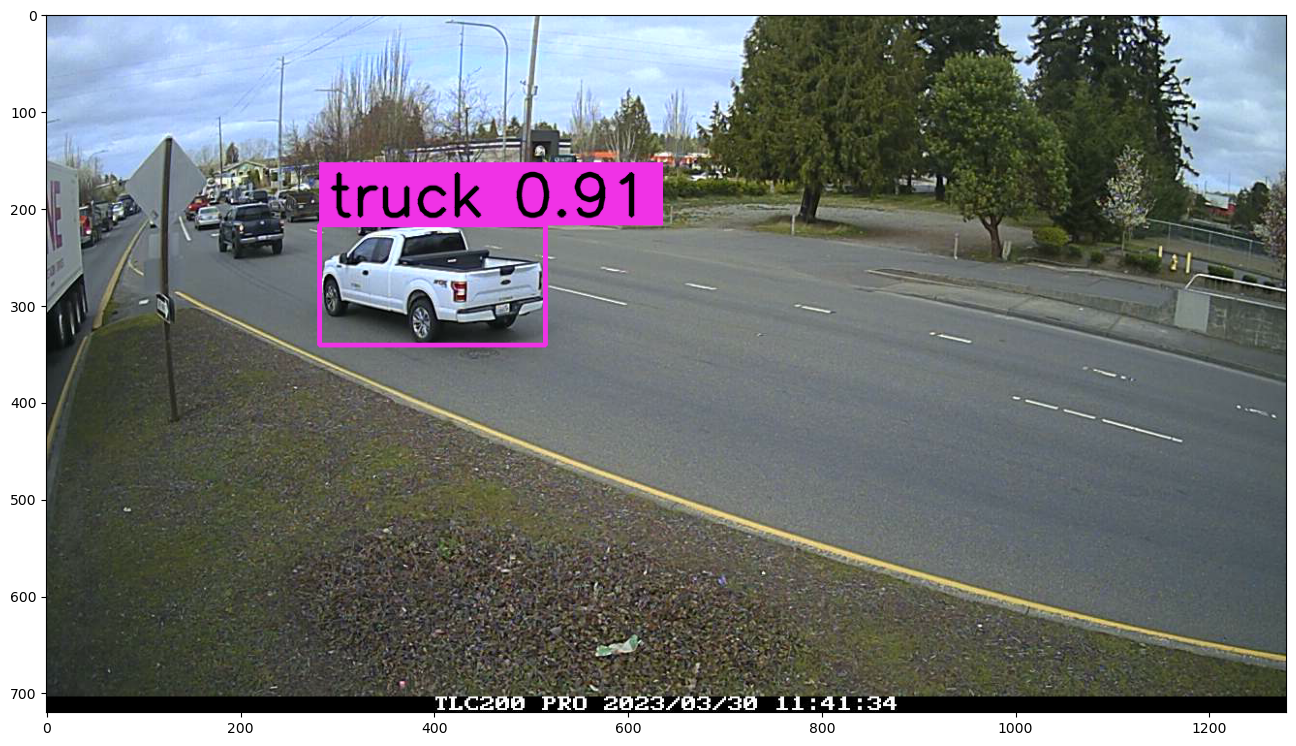

In [26]:
CLASS_NAMES_DICT = model.model.names

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)

# create an iterator on the generator
iterator = iter(generator)
frame = next(iterator)

# model prediction on single frame and conversion to supervision Detections
results = model(frame)[0]
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]

# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

# print(type(results))
# print(results.boxes.xyxy)
# print(results.boxes.cls)
# print(type(frame))

## For video

In [45]:
CLASS_NAMES_DICT = model.model.names

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)

video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
i = 0
# tqdm to show the loading process
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)[0]
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )

        # format custom labels
        labels = [
            f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]

        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

        sink.write_frame(frame)
        i = i + 1
        if (i > 120):
            break

  0%|          | 0/20480 [00:00<?, ?it/s]


0: 384x640 6 cars, 2 trucks, 1168.3ms
Speed: 6.0ms preprocess, 1168.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 2 trucks, 1001.5ms
Speed: 2.0ms preprocess, 1001.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 truck, 990.2ms
Speed: 2.0ms preprocess, 990.2ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 truck, 995.0ms
Speed: 3.0ms preprocess, 995.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 2 trucks, 1021.1ms
Speed: 3.0ms preprocess, 1021.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 3 trucks, 1103.0ms
Speed: 1.0ms preprocess, 1103.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 2 trucks, 1022.2ms
Speed: 2.2ms preprocess, 1022.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 truck, 982.1ms
Sp


0: 384x640 6 cars, 1059.8ms
Speed: 2.0ms preprocess, 1059.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1029.4ms
Speed: 2.0ms preprocess, 1029.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1063.7ms
Speed: 3.5ms preprocess, 1063.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1046.4ms
Speed: 1.8ms preprocess, 1046.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1039.6ms
Speed: 2.0ms preprocess, 1039.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1051.4ms
Speed: 2.0ms preprocess, 1051.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1037.8ms
Speed: 2.0ms preprocess, 1037.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1049.5ms
Speed: 2.0ms preprocess, 1049.5ms inference, 2.5ms postprocess per image at

In [53]:
import cv2
from cv2 import VideoCapture

cap = VideoCapture(TARGET_VIDEO_PATH)

fps = cap.get(cv2.CAP_PROP_FPS)

output_file = f"{HOME}\data\Fed Way Cameras{FOLDER}\output_file.mp4"
output_fps = fps * 4

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, output_fps, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)
    
cap.release()
out.release()
cv2.destroyAllWindows()



## Video with ByteTrack

In [49]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [47]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

NameError: name 'STrack' is not defined

In [52]:
CLASS_NAMES_DICT = model.model.names

byte_tracker = BYTETRAcker

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)

video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
i = 0
# tqdm to show the loading process
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)[0]
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )

        # format custom labels
        labels = [
            f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]

        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

        sink.write_frame(frame)
        i = i + 1
        if (i > 120):
            break

NameError: name 'BYTETRAcker' is not defined

In [62]:
!nvidia-smi

Thu Mar 28 14:26:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.25                 Driver Version: 536.25       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A2000 8GB Lap...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8               3W /  40W |      0MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--